In [230]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [86]:
income_data = pd.read_csv('income.csv')

In [87]:
data = income_data.copy()

In [88]:
data.shape

(31978, 13)

In [89]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [90]:
# Convert all column names to lowercase
data.columns = [col.lower() for col in data.columns]

In [91]:
data.head()

,age,jobtype,edtype,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,salstat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   jobtype        31978 non-null  object
 2   edtype         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  salstat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [93]:
data.isnull().sum()

age              0
jobtype          0
edtype           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salstat          0
dtype: int64

In [94]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [95]:
data.describe(include = 'O')

,jobtype,edtype,maritalstatus,occupation,relationship,race,gender,nativecountry,salstat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [96]:
# List of columns for which to calculate value_counts
columns_to_check = [
    'jobtype', 'edtype', 'maritalstatus', 'occupation', 
    'relationship', 'race', 'gender', 'nativecountry', 'salstat'
]

# Loop through the columns and print value_counts
for col in columns_to_check:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print()

Value counts for column 'jobtype':
jobtype
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Value counts for column 'edtype':
edtype
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64

Value counts for column 'maritalstatus':
maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Mar

In [97]:
# Occupation and Jobtype have special character -- '?'

In [98]:
data = pd.read_csv('income.csv',na_values=[" ?"]) 

In [99]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [100]:
# Convert all column names to lowercase
data.columns = [col.lower() for col in data.columns]

In [101]:
data.isnull().sum()

age                 0
jobtype          1809
edtype              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
salstat             0
dtype: int64

In [102]:
# Adjust display settings to show all columns
pd.set_option('display.max_rows', None)


# Filter rows where 'jobtype' or 'occupation' has missing values
missing_data_rows = data[data['jobtype'].isna() | data['occupation'].isna()]
# Select only 'jobtype' and 'occupation' columns
missing_data_subset = missing_data_rows[['jobtype', 'occupation']]
# Display the result
print(missing_data_subset)

             jobtype occupation
8                NaN        NaN
17               NaN        NaN
29               NaN        NaN
42               NaN        NaN
44               NaN        NaN
57               NaN        NaN
69               NaN        NaN
73               NaN        NaN
75               NaN        NaN
76               NaN        NaN
97               NaN        NaN
133              NaN        NaN
137              NaN        NaN
147              NaN        NaN
148              NaN        NaN
153              NaN        NaN
205              NaN        NaN
213              NaN        NaN
225              NaN        NaN
228              NaN        NaN
243              NaN        NaN
252              NaN        NaN
288              NaN        NaN
340              NaN        NaN
341              NaN        NaN
344              NaN        NaN
358              NaN        NaN
363              NaN        NaN
382              NaN        NaN
386              NaN        NaN
437     

In [103]:

""" Points to note:
1. Missing values in Jobtype    = 1809
2. Missing values in Occupation = 1816 
3. There are 1809 rows where two specific 
   columns i.e. occupation & JobType have missing values
4. (1816-1809) = 7 => You still have occupation unfilled for 
   these 7 rows. Because, jobtype is Never worked
"""

' Points to note:\n1. Missing values in Jobtype    = 1809\n2. Missing values in Occupation = 1816 \n3. There are 1809 rows where two specific \n   columns i.e. occupation & JobType have missing values\n4. (1816-1809) = 7 => You still have occupation unfilled for \n   these 7 rows. Because, jobtype is Never worked\n'

In [104]:
cdata= data.dropna(axis=0)

In [105]:
cdata.shape

(30162, 13)

In [106]:
cdata.isnull().sum()

age              0
jobtype          0
edtype           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salstat          0
dtype: int64

In [107]:
num_feature = ['age','capitalgain','capitalloss','houseperweek']

In [108]:
# Gender proportion table:
gender = pd.crosstab(index = cdata["gender"], columns  = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [109]:
# =============================================================================
#  Gender vs Salary Status:
# =============================================================================
gender_salstat = pd.crosstab(index = cdata["gender"],columns = cdata['salstat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

salstat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


In [132]:
# In salstat there is one leading space 

In [130]:
# Using loc to map values
cdata.loc[cdata['salstat'] == ' greater than 50,000', 'salstat'] = 1
cdata.loc[cdata['salstat'] == ' less than or equal to 50,000', 'salstat'] = 0

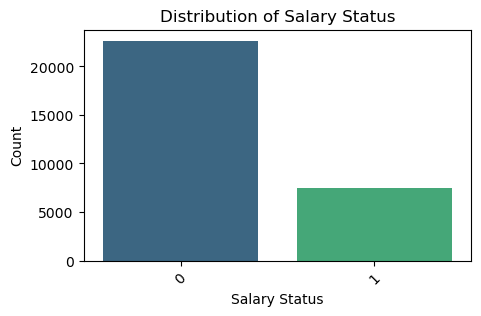

In [138]:
# salstat count plot
plt.figure(figsize=(5, 3))
sns.countplot(x='salstat', data=cdata, palette='viridis')
plt.title('Distribution of Salary Status')
plt.xlabel('Salary Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_11992\2016576167.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdata['age'], bins=10, kde=False)


<Axes: xlabel='age'>

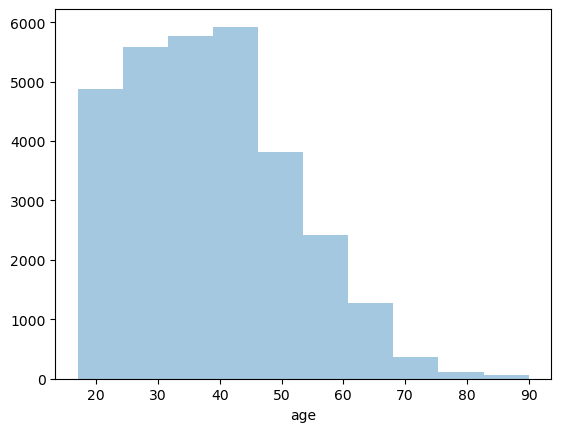

In [143]:
# Histogram of Age 
sns.distplot(cdata['age'], bins=10, kde=False)
# People with age 20-45 age are high in frequency

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_11992\2413763860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdata['capitalgain'], bins = 10, kde = False)
C:\Users\ITFACT\AppData\Local\Temp\ipykernel_11992\2413763860.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdata['capitalloss'], 

<Axes: xlabel='capitalloss'>

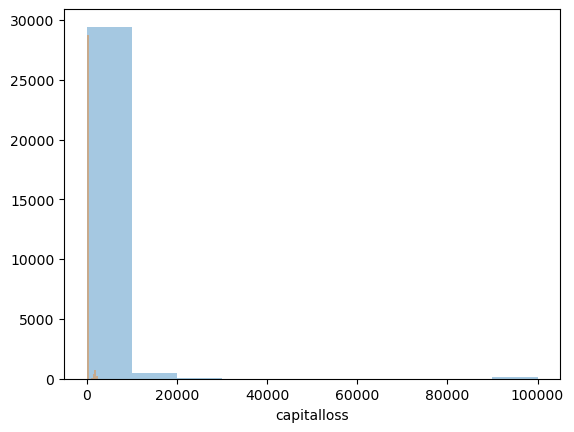

In [144]:
# Capital gain
sns.distplot(cdata['capitalgain'], bins = 10, kde = False)

C:\Users\ITFACT\AppData\Local\Temp\ipykernel_11992\3387644085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdata['capitalloss'], bins = 10, kde = False)


<Axes: xlabel='capitalloss'>

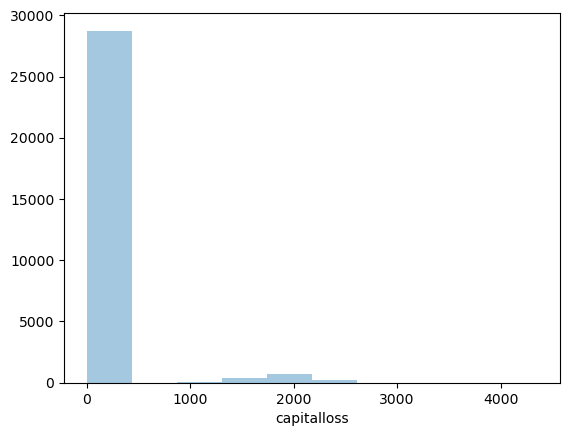

In [146]:
sns.distplot(cdata['capitalloss'], bins = 10, kde = False)

# EDA

In [148]:
cdata.head()

,age,jobtype,edtype,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,salstat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0


In [161]:
numerical_features = ['age','capitalgain','capitalloss','hoursperweek']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


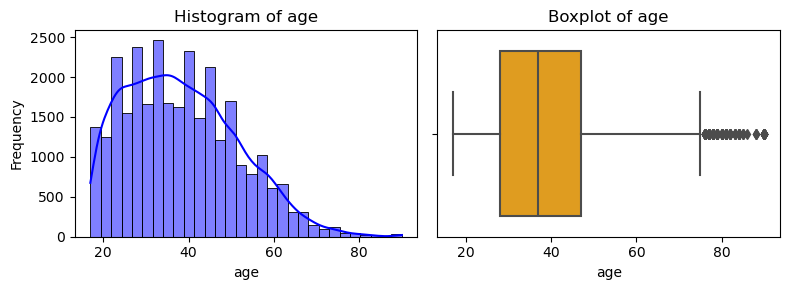

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


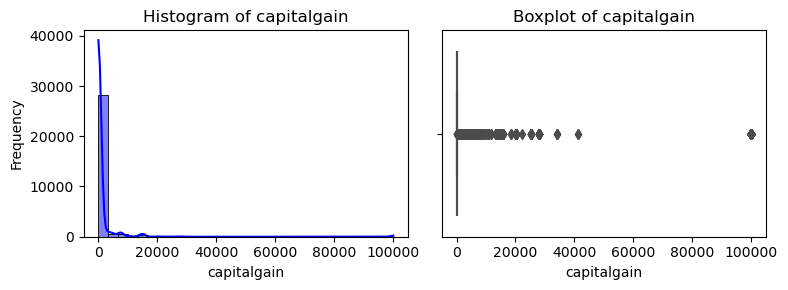

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


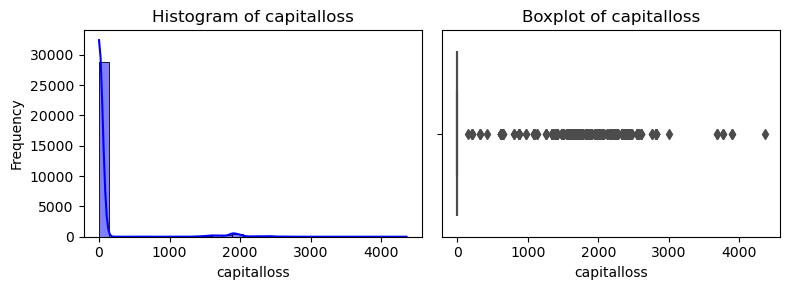

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


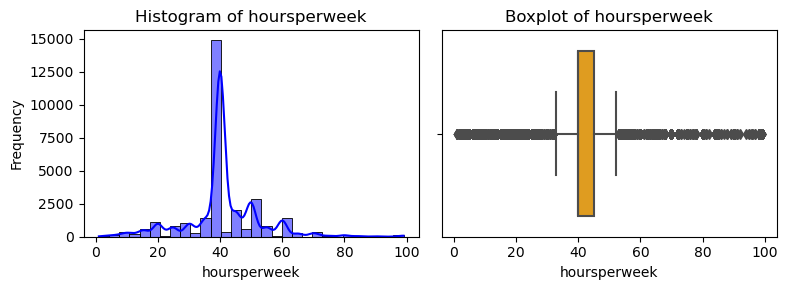

In [156]:
# Loop through numerical features to create histograms and boxplots
for feature in numerical_features:
    plt.figure(figsize=(8,3))   # The first value (10) sets the width, and the second value (4) sets the height of the figure
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=cdata, x=feature, kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=cdata, x=feature, color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

In [162]:
categorical_features = ['jobtype','edtype','maritalstatus','occupation','relationship','race','gender','nativecountry']

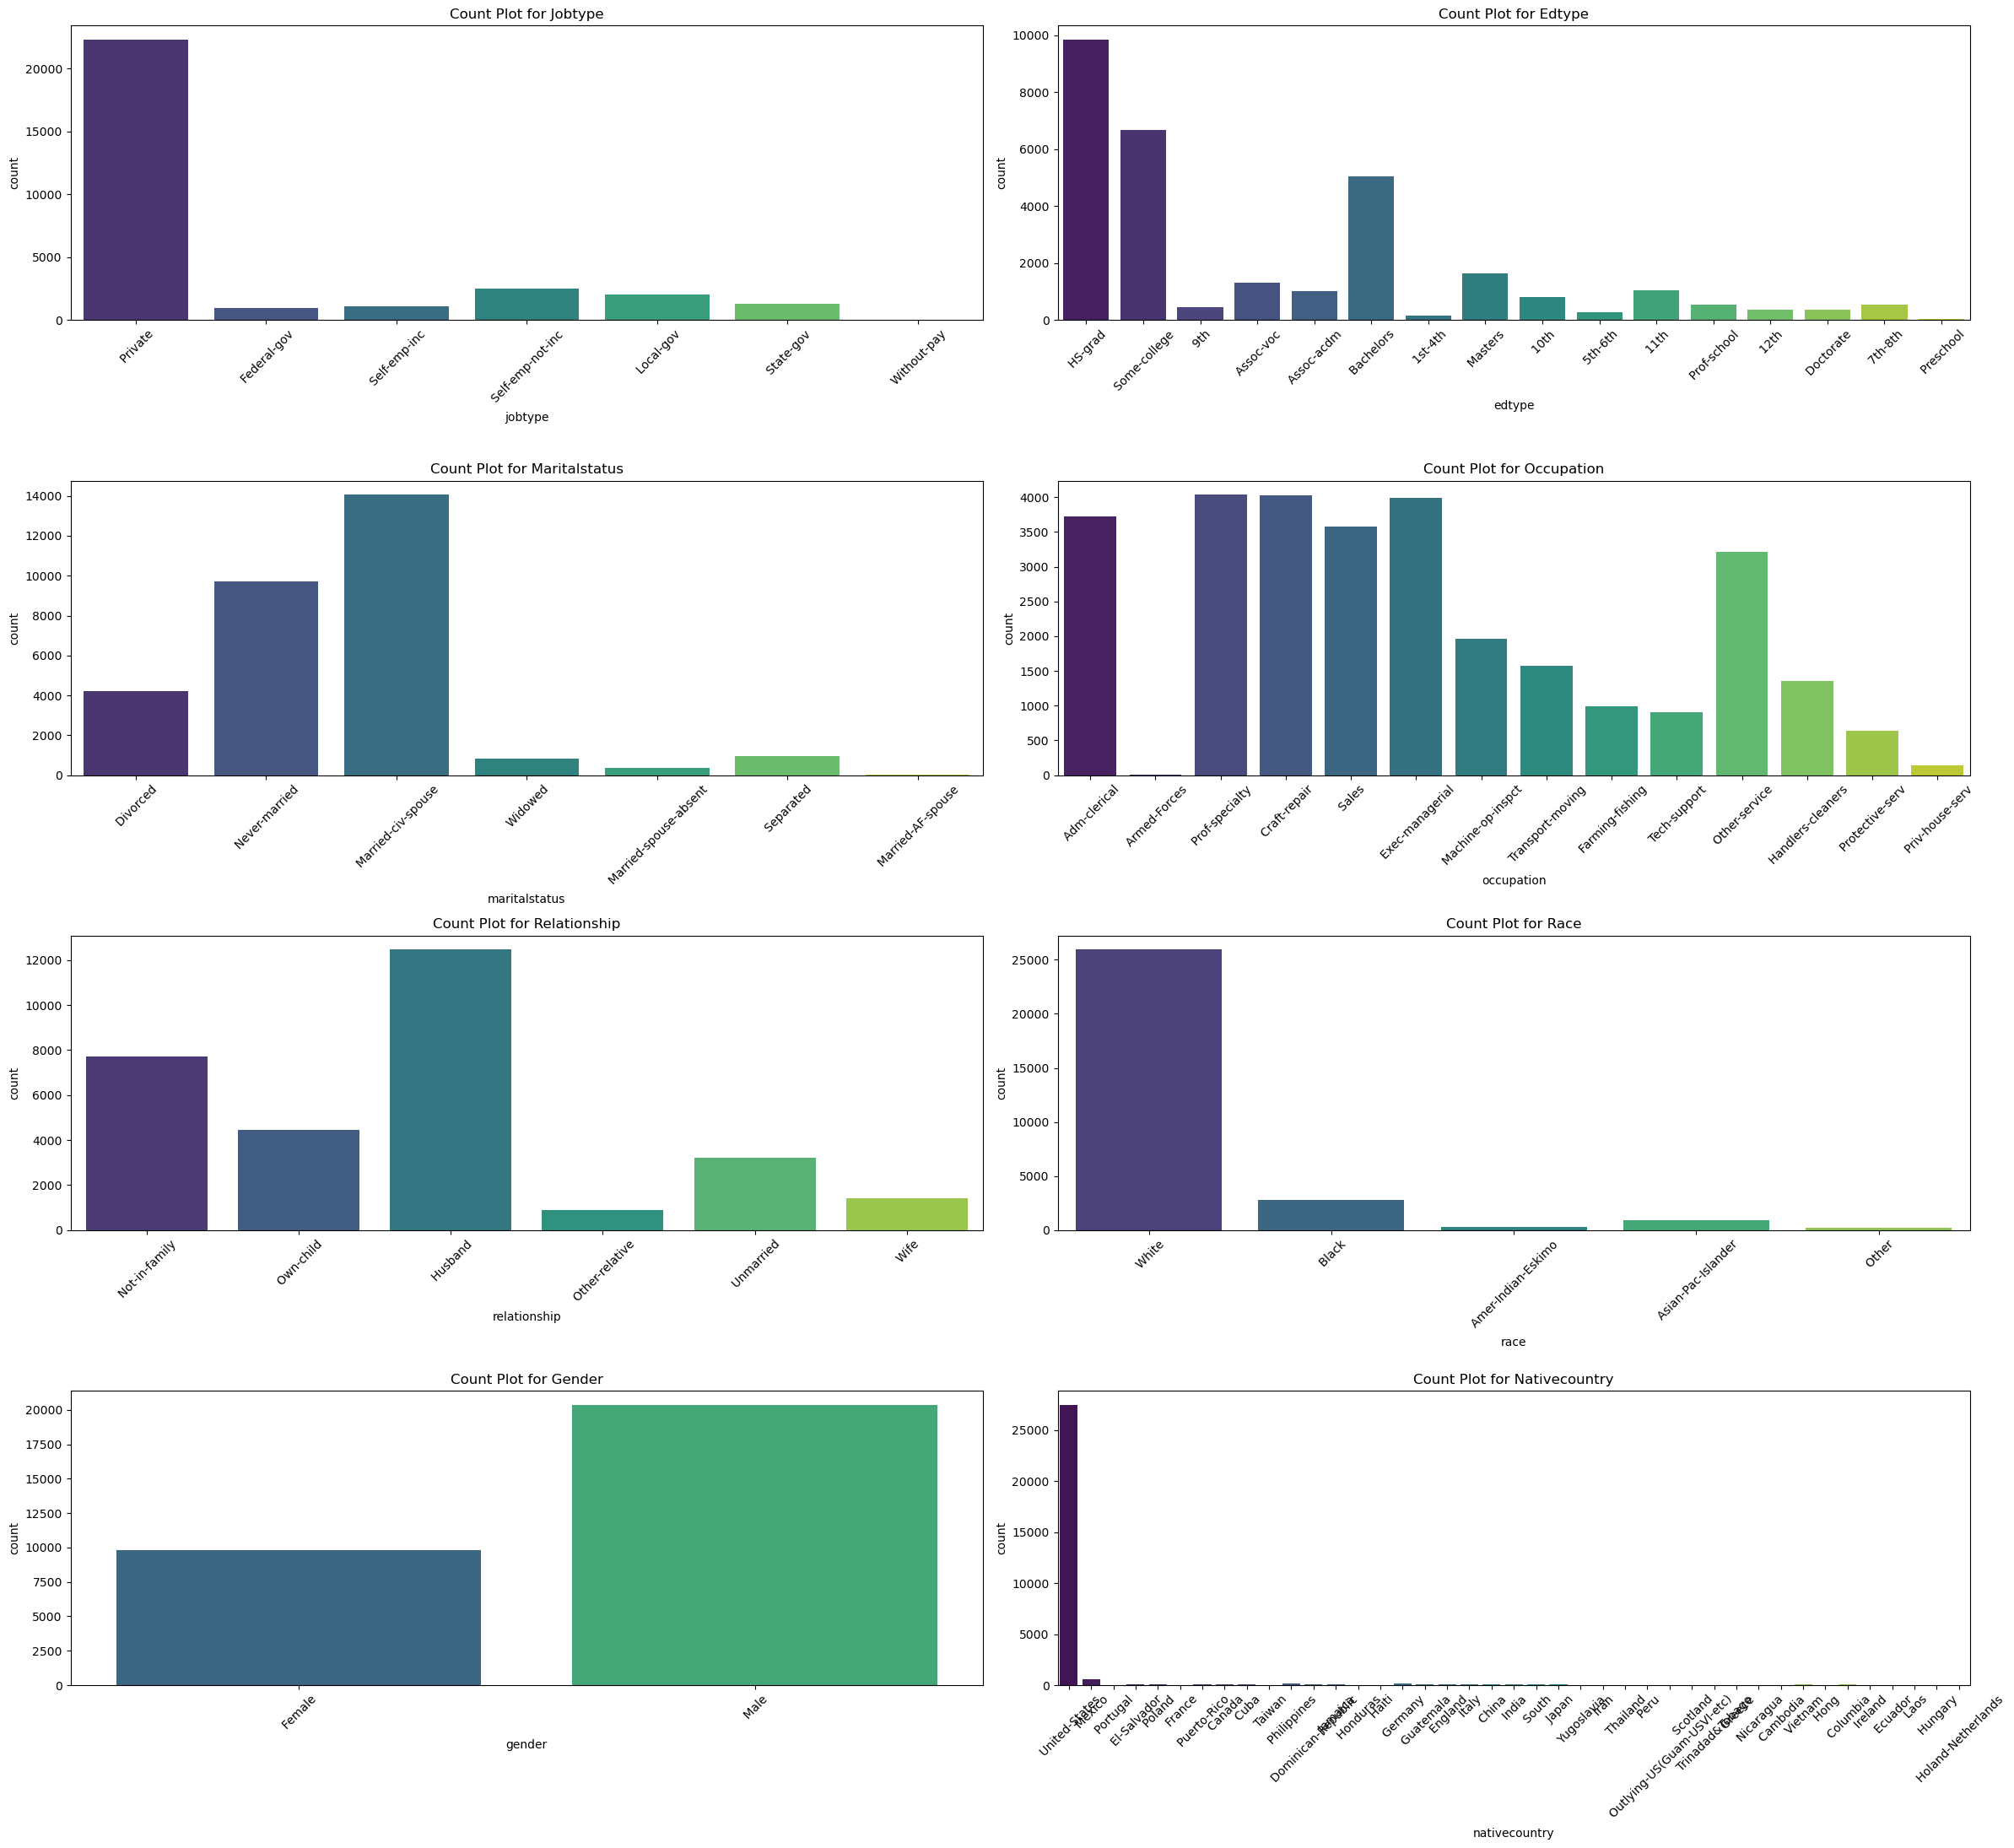

In [169]:
# Set up the figure size for better readability
plt.figure(figsize=(24,22))

# Loop through the categorical features and plot count plots
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)  # Create a grid of 3 rows and 2 columns
    sns.countplot(data=cdata, x=feature, palette="viridis")
    plt.title(f"Count Plot for {feature.capitalize()}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust subplot layout
plt.show()

In [193]:
# jobtype
job_salstat =pd.crosstab(index = cdata["jobtype"],columns = cdata['salstat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

salstat,0,1
jobtype,,
Federal-gov,61.3,38.7
Local-gov,70.5,29.5
Private,78.1,21.9
Self-emp-inc,44.1,55.9
Self-emp-not-inc,71.4,28.6
State-gov,73.1,26.9
Without-pay,100.0,0.0
All,75.1,24.9


In [195]:
# edtype
EdType_salstat = pd.crosstab(index = cdata["edtype"], columns = cdata['salstat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

salstat,0,1
edtype,,
10th,92.8,7.2
11th,94.4,5.6
12th,92.3,7.7
1st-4th,96.0,4.0
5th-6th,95.8,4.2
7th-8th,93.7,6.3
9th,94.5,5.5
Assoc-acdm,74.6,25.4
Assoc-voc,73.7,26.3


In [196]:
# occupation
occ_salstat = pd.crosstab(index = cdata["occupation"], columns = cdata['salstat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)

salstat,0,1
occupation,,
Adm-clerical,86.6,13.4
Armed-Forces,88.9,11.1
Craft-repair,77.5,22.5
Exec-managerial,51.5,48.5
Farming-fishing,88.4,11.6
Handlers-cleaners,93.9,6.1
Machine-op-inspct,87.5,12.5
Other-service,95.9,4.1
Priv-house-serv,99.3,0.7


In [201]:
cdata.shape

(30162, 13)

In [202]:
try1 = cdata.copy()

In [ ]:
# model building

In [208]:
#try1.head()

In [209]:
new_data=pd.get_dummies(try1, drop_first=True , dtype = int)

In [210]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,jobtype_ Local-gov,jobtype_ Private,jobtype_ Self-emp-inc,jobtype_ Self-emp-not-inc,jobtype_ State-gov,jobtype_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,salstat_1
0,45,0,0,28,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,27,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [211]:
new_data.shape

(30162, 95)

In [212]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['capitalloss', 'capitalgain', 'age', 'hoursperweek']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the original data
new_data[numerical_features] = scaler.fit_transform(new_data[numerical_features])

In [213]:
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,jobtype_ Local-gov,jobtype_ Private,jobtype_ Self-emp-inc,jobtype_ Self-emp-not-inc,jobtype_ State-gov,jobtype_ Without-pay,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,salstat_1
0,0.499610,-0.147445,-0.218586,-1.079421,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-1.099239,-0.147445,-0.218586,-0.077734,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.423474,-0.147445,-0.218586,-0.077734,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,-0.870832,-0.147445,-0.218586,-0.077734,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.403782,-0.147445,-0.218586,-0.495104,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model building

In [ ]:
# logistic regression 

In [235]:
# Splitting the data into features and target
X = new_data.drop('salstat_1', axis=1)  # Features
y = new_data['salstat_1']  # Target variable

In [236]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Initialize the logistic regression model
#model = LogisticRegression(random_state=42, max_iter=200)
model = LogisticRegression(random_state=42, max_iter=300, C=1.0, penalty='l2')

In [238]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=42)

In [239]:
# Make predictions
y_pred = model.predict(X_test)

In [240]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8471738770097795
Confusion Matrix:
[[4220  328]
 [ 594  891]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4548
           1       0.73      0.60      0.66      1485

    accuracy                           0.85      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
# Random forest

In [252]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Create the Random Forest model with adjusted parameters
"""""rf_classifier = RandomForestClassifier(
    n_estimators=200,          # Increased number of trees
    max_depth=25,              # Increased depth of trees
    min_samples_split=5,       # Decreased samples required to split a node
    min_samples_leaf=3,        # Decreased samples required to be a leaf
    max_features='auto',       # Use all features at each split
    bootstrap=True,            # Using bootstrap sampling
    random_state=42
)"""

'""rf_classifier = RandomForestClassifier(\n    n_estimators=200,          # Increased number of trees\n    max_depth=25,              # Increased depth of trees\n    min_samples_split=5,       # Decreased samples required to split a node\n    min_samples_leaf=3,        # Decreased samples required to be a leaf\n    max_features=\'auto\',       # Use all features at each split\n    bootstrap=True,            # Using bootstrap sampling\n    random_state=42\n)'

In [253]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [254]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

In [255]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [256]:
# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8461793469252444
Confusion Matrix:
[[4157  391]
 [ 537  948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4548
           1       0.71      0.64      0.67      1485

    accuracy                           0.85      6033
   macro avg       0.80      0.78      0.79      6033
weighted avg       0.84      0.85      0.84      6033



In [ ]:
# Decision tree 

In [231]:
# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [232]:
# Fit the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [233]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [234]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.8188297696005304,
 array([[4027,  521],
        [ 572,  913]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.88      4548\n           1       0.64      0.61      0.63      1485\n\n    accuracy                           0.82      6033\n   macro avg       0.76      0.75      0.75      6033\nweighted avg       0.82      0.82      0.82      6033\n')

In [ ]:
# KNN

In [258]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
# Create the KNN model with adjusted parameters
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,       # Number of neighbors to use
    weights='uniform',   # Uniform weight distribution
    algorithm='auto',    # Algorithm for finding the nearest neighbors
    leaf_size=30,        # Leaf size passed to BallTree or KDTree
    p=2                 # Power parameter for the Minkowski distance
)

In [260]:
# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [262]:
# Get accuracy and classification report
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8257914801922758
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4548
           1       0.66      0.61      0.63      1485

    accuracy                           0.83      6033
   macro avg       0.77      0.75      0.76      6033
weighted avg       0.82      0.83      0.82      6033

